In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw11.ipynb")

/home/tdejaege/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/tdejaege/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Homework 11: Regression Inference

**Reading**: 

* [Inference for Regression](https://aup-cs2065.github.io/textbook/html/chapters/16/Inference_for_Regression.html)

Please complete this notebook by filling in the cells provided.


Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

For all problems that you must write our explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on.

In [4]:
# Don't change this cell; just run it. 

import numpy as np
import pandas as pd
# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets



## Regression Inference for the NFL Draft

In this homework, we will be analyzing the relationship between draft position and success in the NFL. The NFL draft is an annual event in which every NFL team takes turns choosing players that they will add to their team. There are around 200 selections, called "picks" made every year, although this number has changed over the years.

The `nfl` table has five columns, the name of the `Player`, the `Salary` that player made for the 2019 season, the year that player was drafted (`Year Drafted`), the number of the draft pick that was used when the player was drafted (`Pick Number`), and the `Position` in football that player plays.

Each row in `nfl` corresponds to one player who played in the **2019 season**.

In [3]:
# Just run this cell!
nfl = Table.read_table("nfl.csv")
nfl.show(5)

NameError: name 'Table' is not defined

In [5]:
nfl=pd.read_csv('nfl.csv')
nfl.head(5)

,Player,Salary,Year Drafted,Pick Number,Position
0,Baker Mayfield,570000,2018,1,QB
1,Cam Newton,16200000,2011,1,QB
2,Eli Manning,11500000,2004,1,QB
3,Eric Fisher,10350000,2013,1,OT
4,Jadeveon Clowney,15967200,2014,1,DE


#### Question 1

Add a column to the table called `Career Length` that corresponds to how long a player has been in the NFL to the `nfl` table. `Career Length` is from when they were drafted to this year, 2020. So, if a player was drafted in 2015, their career length is 5:
$$2020-2015=5$$

<!--
BEGIN QUESTION
name: q1_1
manual: false
-->

In [7]:
nfl['Career Length']=2024-nfl['Year Drafted']
nfl.head(5)

,Player,Salary,Year Drafted,Pick Number,Position,Career Length
0,Baker Mayfield,570000,2018,1,QB,6
1,Cam Newton,16200000,2011,1,QB,13
2,Eli Manning,11500000,2004,1,QB,20
3,Eric Fisher,10350000,2013,1,OT,11
4,Jadeveon Clowney,15967200,2014,1,DE,10


In [ ]:
grader.check("q1_1")

As usual, let's investigate our data visually before analyzing it numerically. The first relationship we will analyze is the relationship between a player's `Pick Number` and their `Career Length`. Run the following cell to see a scatter diagram with the line of best fit already plotted for you.

In [6]:
# Just run this cell
nfl.scatter("Pick Number", "Career Length", fit_line=True)

y=-0.009*x+9.454


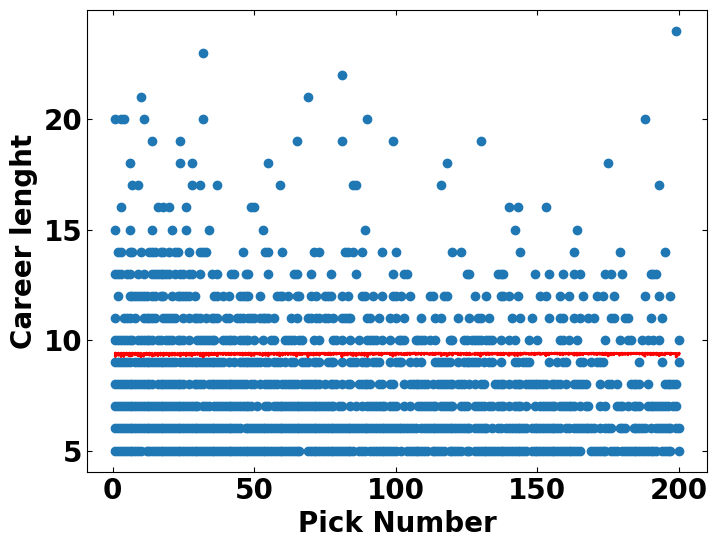

In [9]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

x_data = nfl['Pick Number'].values.reshape(-1, 1)
y_data = nfl['Career Length'].values.reshape(-1, 1)
regr = linear_model.LinearRegression()
regr.fit (x_data, y_data)
a_ori,b_ori=regr.coef_[0][0],regr.intercept_[0]
print('y=%0.3f*x+%0.3f'%(a_ori,b_ori))
fig, ax1 = plt.subplots(figsize=(8,6), facecolor='w', edgecolor='k')

ax1.plot(nfl['Pick Number'].values, nfl['Career Length'].values*a_ori+b_ori, lw=2, color='red')


ax1.scatter(nfl['Pick Number'].values, nfl['Career Length'].values)
ax1.set_xlabel('Pick Number',fontsize=20,fontweight='bold')
ax1.set_ylabel('Career lenght',fontsize=20,fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=20,direction='in',right='on',top='on')

ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')
plt.show()

#### Question 2

Use the functions given to assign the correlation between `Pick Number` and `Career Length` to `pick_length_correlation`. `correlation` takes in three arguments, a table `tbl` and the labels of the columns you are finding the correlation between, `col1` and `col2`.

<!--
BEGIN QUESTION
name: q1_2
manual: false
-->

In [11]:
def standard_units(arr):
    return (arr- np.mean(arr)) / np.std(arr)

def correlation(df, col1, col2):
    r = np.mean(standard_units(df[col1]) * standard_units(df[col2]))
    return r

pick_length_correlation = correlation(nfl,'Pick Number','Career Length')
pick_length_correlation

-0.16517332737646848

In [ ]:
grader.check("q1_2")

We can see that there is a negative association between `Pick Number` and `Career Length`! If in the sample, we found a linear relation between the two variables, would the same be true for the population? Would it be exactly the same linear relation? Could we predict the response of a new individual who is not in our sample?

<!-- BEGIN QUESTION -->

#### Question 3

Evan thinks that the slope of the true line of best fit for `Pick Number` and `Career Length` is not zero: that is, there is some correlation/association between `Pick Number` and `Career Length`. To test this claim, we can run a hypothesis test! Define the null and alternative hypothesis for this test.

<!--
BEGIN QUESTION
name: q1_3
manual: true
-->

Null Hypothesis (H0): There is no relationship between a player's draft pick number and their career length, r=0
Alternative Hypothesis (H1): There is a relationship between a player's draft pick number and their career length.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Question 4

Saurav says that instead of finding the slope for each resample, we can find the correlation instead, and that we will get the same result. Why is he correct? What is the relationship between slope and correlation?

<!--
BEGIN QUESTION
name: q1_4
manual: true
-->

there is a relationship between the slope of the regression line and the correlation coefficient. we can see that the slope (a) is directly proportional to the correlation coefficient (r).

<!-- END QUESTION -->

#### Question 5
Define the function `one_resample_r` that performs a bootstrap and finds the correlation between `Pick Number` and `Career Length` in the resample. `one_resample_r` should take three arguments, a table `tbl` and the labels of the columns you are finding the correlation between, `col1` and `col2`.

<!--
BEGIN QUESTION
name: q1_5
manual: false
-->

In [13]:
def one_resample_r(tbl, col1, col2):
    # Bootstrap resampling
    resample = tbl.sample(frac=1, replace=True)
    
    # Calculate correlation between col1 and col2 in the resampled data
    correlation = np.corrcoef(resample[col1], resample[col2])[0, 1]
    
    return correlation

# Don't change this line below!
one_resample = one_resample_r(nfl, "Pick Number", "Career Length")
one_resample

-0.16234816354959306

In [ ]:
grader.check("q1_5")

<!-- BEGIN QUESTION -->

#### Question 6

Generate 1000 bootstrapped correlations for `Pick Number` and `Career Length`, store your results in the array `resampled_correlations_pc`, and plot a histogram of your results.

<!--
BEGIN QUESTION
name: q1_6
manual: true
-->

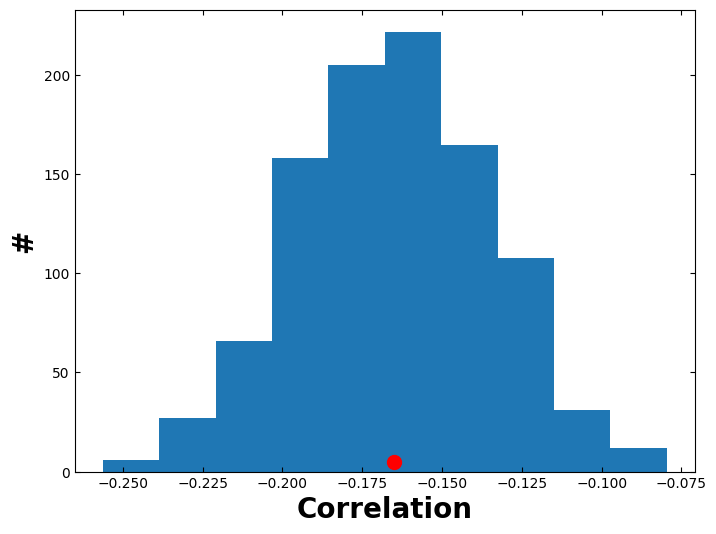

In [17]:
resampled_correlations_pc = []

# Simulation
for i in np.arange(1000):
    resampled_correlations_pc.append(one_resample_r(nfl, "Pick Number", "Career Length"))
# Convert slopes from array to DataFrame
resampled_correlations_pc = pd.DataFrame({'Bootstrap Slope': resampled_correlations_pc})

fig, ax1 = plt.subplots(figsize=(8,6), facecolor='w', edgecolor='k')

# Horizontal Bar Plot
ax1.hist(resampled_correlations_pc['Bootstrap Slope'].values)
ax1.set_ylabel('#',fontsize=20,fontweight='bold')
ax1.set_xlabel('Correlation',fontsize=20,fontweight='bold')
ax1.plot(pick_length_correlation, 5, 'ro',ms=10)                 # Additional point

ax1.tick_params(axis='both', which='major', labelsize=10,direction='in',right='on',top='on')
plt.show()

<!-- END QUESTION -->

#### Question 7

Calculate a 95% confidence interval for the resampled correlations and assign either `True` or `False` to `reject` if we can reject the null hypothesis or if we cannot reject the null hypothesis using a 5% p-value cutoff.

<!--
BEGIN QUESTION
name: q1_7
manual: false
-->

In [24]:

alpha=0.05
lower_bound_pc = np.percentile(resampled_correlations_pc, 100 * alpha / 2)
upper_bound_pc = np.percentile(resampled_correlations_pc, 100 * (1 - alpha / 2))

# Check if the observed correlation falls within the confidence interval
reject = 0 < lower_bound_pc or 0 > upper_bound_pc


# Don't change this!
print(f"95% CI: [{lower_bound_pc}, {upper_bound_pc},{test}] , Reject the null: {reject}")

95% CI: [-0.22599924272161775, -0.10823063189390458,-0.22599924272161775] , Reject the null: True


In [ ]:
grader.check("q1_7")

Now let's investigate the relationship between `Pick Number` and `Salary`. As usual, let's inspect our data visually first. A line of best fit is plotted for you.

In [21]:
# Just run this cell!
nfl.scatter("Pick Number", "Salary", fit_line=True)

y=-16229.882*x+3732861.986


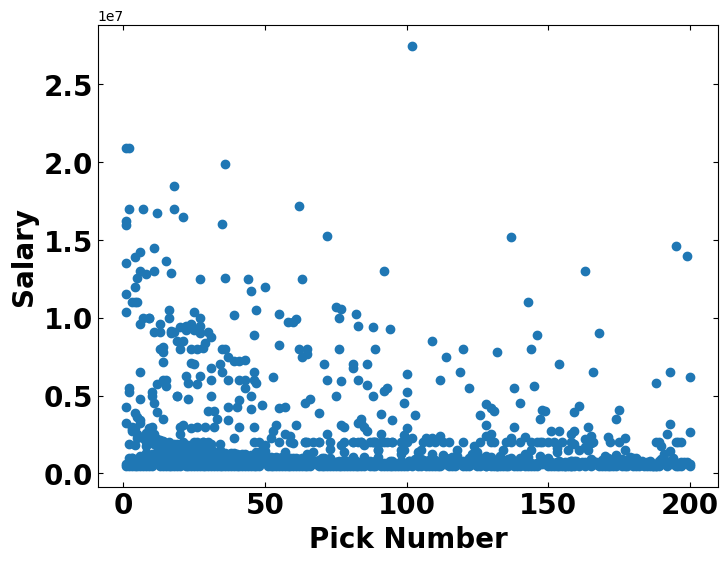

In [27]:
x_data = nfl['Pick Number'].values.reshape(-1, 1)
y_data = nfl['Salary'].values.reshape(-1, 1)
regr = linear_model.LinearRegression()
regr.fit (x_data, y_data)
a_ori,b_ori=regr.coef_[0][0],regr.intercept_[0]
print('y=%0.3f*x+%0.3f'%(a_ori,b_ori))
fig, ax1 = plt.subplots(figsize=(8,6), facecolor='w', edgecolor='k')

#ax1.plot(nfl['Pick Number'].values, nfl['Salary'].values*a_ori+b_ori, lw=2, color='red')


ax1.scatter(nfl['Pick Number'].values, nfl['Salary'].values)
ax1.set_xlabel('Pick Number',fontsize=20,fontweight='bold')
ax1.set_ylabel('Salary',fontsize=20,fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=20,direction='in',right='on',top='on')

ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')
plt.show()

#### Question 8

Using the function `correlation`, find the correlation between `Pick Number` and `Salary` and assign it to `pick_salary_correlation`.


<!--
BEGIN QUESTION
name: q1_8
manual: false
-->

In [28]:
pick_salary_correlation = correlation(nfl,'Pick Number','Salary')
pick_salary_correlation

-0.2812388644684761

In [ ]:
grader.check("q1_8")

We can see that there is a negative association between `Pick Number` and `Salary`! 

<!-- BEGIN QUESTION -->

#### Question 9

Once again, Evan thinks that the slope of the true line of best fit for `Pick Number` and `Salary` is not zero: that is, there is some correlation/association between `Pick Number` and `Salary`. To test this claim, we can run a hypothesis test! Define the null and alternative hypothesis for this test.

<!--
BEGIN QUESTION
name: q1_9
manual: true
-->

Null Hypothesis (H0): There is no relationship between a player's draft pick number and their salary, r=0
Alternative Hypothesis (H1): There is a relationship between a player's draft pick number and their salary.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Question 10

Generate 1000 bootstrapped correlations for `Pick Number` and `Salary`, append them to the array `resampled_correlations_salary`, and then plot a histogram of your results.

<!--
BEGIN QUESTION
name: q1_10
manual: true
-->

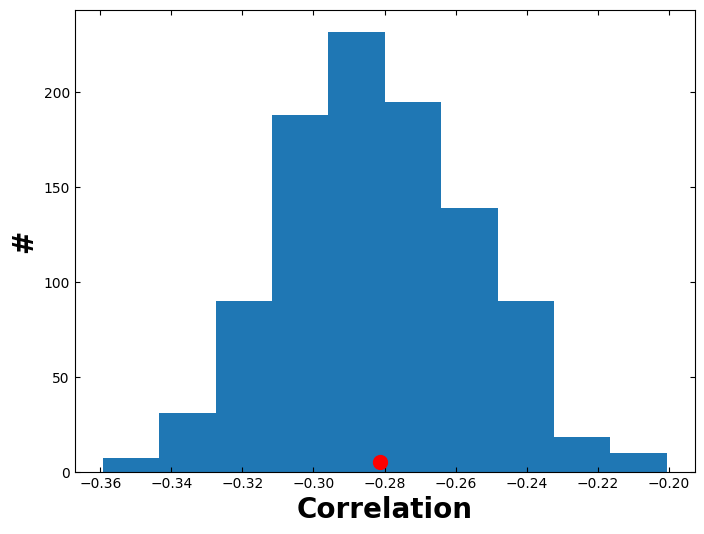

In [30]:
resampled_correlations_sal = []

# Simulation
for i in np.arange(1000):
    resampled_correlations_sal.append(one_resample_r(nfl, "Pick Number", "Salary"))
# Convert slopes from array to DataFrame
resampled_correlations_sal = pd.DataFrame({'Bootstrap Slope': resampled_correlations_sal})

fig, ax1 = plt.subplots(figsize=(8,6), facecolor='w', edgecolor='k')

# Horizontal Bar Plot
ax1.hist(resampled_correlations_sal['Bootstrap Slope'].values)
ax1.set_ylabel('#',fontsize=20,fontweight='bold')
ax1.set_xlabel('Correlation',fontsize=20,fontweight='bold')
ax1.plot(pick_salary_correlation, 5, 'ro',ms=10)                 # Additional point

ax1.tick_params(axis='both', which='major', labelsize=10,direction='in',right='on',top='on')
plt.show()

<!-- END QUESTION -->

#### Question 11

Calculate a 95% confidence interval for the resampled correlations and assign either `True` or `False` to `reject_sal` if we can reject the null hypothesis or if we cannot reject the null hypothesis using a 5% p-value cutoff.


<!--
BEGIN QUESTION
name: q1_11
manual: false
-->

In [31]:
alpha=0.05
lower_bound_sal = np.percentile(resampled_correlations_sal, 100 * alpha / 2)
upper_bound_sal = np.percentile(resampled_correlations_sal, 100 * (1 - alpha / 2))

# Check if the observed correlation falls within the confidence interval
reject = 0 < lower_bound_sal or 0 > upper_bound_sal


# Don't change this!
print(f"95% CI: [{lower_bound_sal}, {upper_bound_sal}] , Reject the null: {reject}")

95% CI: [-0.3324588674194942, -0.23093635547292635] , Reject the null: True


In [ ]:
grader.check("q1_11")

## Analyzing Residuals

Next, Evan wants to predict his Career Length and Salary based on his Pick Number. To understand what his Career Length and Salary might be, Evan wants to generate confidence intervals of possible values for both career length and salary. First, let's investigate how effective our predictions for career length and salary based on pick number are.

#### Question 12

Calculate the slope and intercept for the line of best fit for `Pick Number` vs `Career Length` and for `Pick Number` vs `Salary`. Assign these values to `career_length_slope`, `career_length_intercept`, `salary_slope`, and `salary_intercept` respectively. The function `parameters` returns a two-item array containing the slope and intercept of a linear regression line.

*Hint 1: Use the `parameters` function with the arguments specified!*

*Hint 2: Remember we're predicting career length and salary **based off** a pick number. That should tell you what the `colx` and `coly` arguments you should specify when calling `parameters`.*

<!--
BEGIN QUESTION
name: q1_12
manual: false
-->

In [35]:
# DON'T EDIT THE PARAMETERS FUNCTION
def parameters(df, colx, coly):
    x = df[colx]
    y = df[coly]
    
    r = correlation(df, colx, coly)
    
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_sd = np.std(x)
    y_sd = np.std(y)
    
    slope = (y_sd / x_sd) * r
    intercept = y_mean - (slope * x_mean)
    return slope,intercept

career_length_slope = parameters(nfl, 'Pick Number', 'Career Length')[0]
career_length_intercept = parameters(nfl, 'Pick Number', 'Career Length')[1]

salary_slope = parameters(nfl, 'Pick Number', 'Salary')[0]
salary_intercept = parameters(nfl, 'Pick Number', 'Salary')[1]

career_length_slope,career_length_intercept

(-0.009271872759513227, 9.453855957849608)

In [ ]:
grader.check("q1_12")

<!-- BEGIN QUESTION -->

#### Question 13

Draw a scatter plot of the residuals for each line of best fit for `Pick Number` vs `Career Length` and for `Pick Number` vs `Salary`.

*Hint: We want to get the predictions for every player in the dataset*

*Hint 2: This question is really involved, try to follow the skeleton code!*

<!--
BEGIN QUESTION
name: q1_13
manual: true
-->

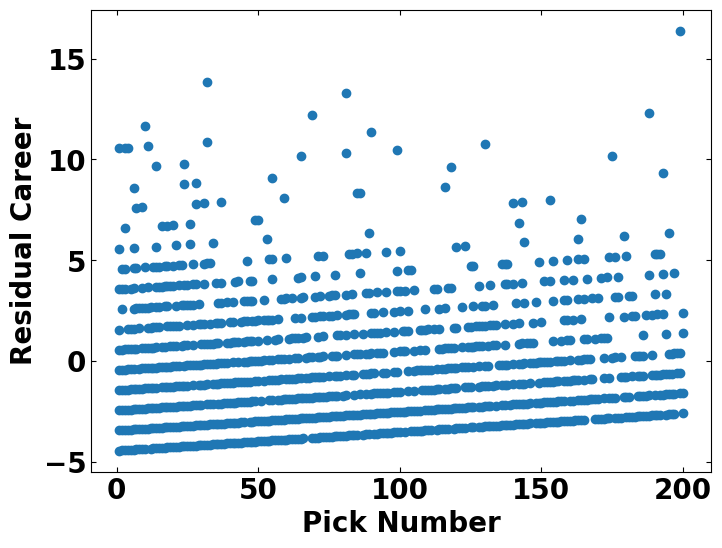

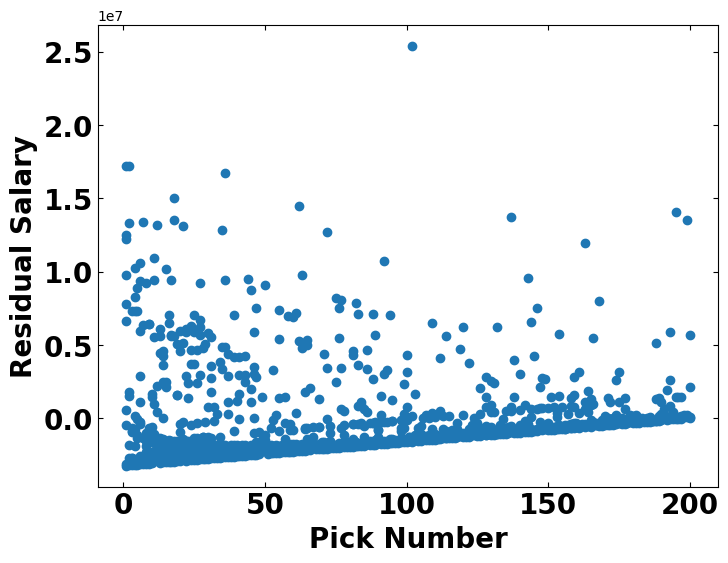

In [37]:
predicted_career_lengths = nfl['Pick Number']*career_length_slope+career_length_intercept
predicted_salaries = nfl['Pick Number']*salary_slope+salary_intercept


career_length_residuals = nfl['Career Length']-predicted_career_lengths
salary_residuals = nfl['Salary']-predicted_salaries

nfl_with_residuals = nfl
nfl_with_residuals['Career Length Residuals']=career_length_residuals
nfl_with_residuals['Salary Residuals']=salary_residuals


# Now generate two scatter plots!
fig, ax1 = plt.subplots(figsize=(8,6), facecolor='w', edgecolor='k')


ax1.scatter(nfl_with_residuals['Pick Number'],nfl_with_residuals['Career Length Residuals'])
ax1.set_xlabel('Pick Number',fontsize=20,fontweight='bold')
ax1.set_ylabel('Residual Career',fontsize=20,fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=20,direction='in',right='on',top='on')

ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')
plt.show()

fig, ax1 = plt.subplots(figsize=(8,6), facecolor='w', edgecolor='k')


ax1.scatter(nfl_with_residuals['Pick Number'],nfl_with_residuals['Salary Residuals'])
ax1.set_xlabel('Pick Number',fontsize=20,fontweight='bold')
ax1.set_ylabel('Residual Salary',fontsize=20,fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=20,direction='in',right='on',top='on')

ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')
plt.show()

<!-- END QUESTION -->



Here's a [link](https://www.inferentialthinking.com/chapters/15/6/Numerical_Diagnostics.html) to properties of residuals in the textbook that could help out with some questions.

<!-- BEGIN QUESTION -->

#### Question 14

Based on these plots of residuals, do you think linear regression is a good model for `Pick Number` vs `Career Length` and for `Pick Number` vs `Salary`? Explain for both.

<!--
BEGIN QUESTION
name: q1_14
manual: true
-->

For both, the residual plot shows a clear pattern then linear regression may not be appropriate for modeling the relationship between "Pick Number" and "Career Length."/"Salary"

<!-- END QUESTION -->

#### Question 15

Assign `career_length_residual_corr` and `salary_residual_corr` to either 1, 2 or 3 corresponding to whether or not the correlation between `Pick Number` and `Career Length Residuals` is positive, zero, or negative, and to whether or not the correlation between `Pick Number` and `Salary Residuals` is positive, zero, or negative respectively.

1. Positive
2. Zero
3. Negative

<!--
BEGIN QUESTION
name: q1_15
manual: false
-->

In [38]:
career_length_residual_corr = 1
salary_residual_corr = 1

In [39]:
grader.check("q1_15")

RuntimeError: Malformed test file: does not define the global variable 'OK_FORMAT'

It looks like the largest residuals are positive residuals, so let's investigate those more closely.

#### Question 16

Let's investigate where our regression line is making errors. Using the `nfl_with_residuals` table, assign `greatest_career_length_residual` to the string that is the name of the player with the largest positive residual for `Pick Number` vs `Career Length`.


<!--
BEGIN QUESTION
name: q1_16
manual: false
-->

In [44]:
greatest_career_length_residual = nfl_with_residuals.loc[nfl_with_residuals['Career Length Residuals'].idxmax()].Player
greatest_career_length_residual

'Tom Brady'

In [ ]:
grader.check("q1_16")

Now let's investigate the residuals for salary. Run the cell below to see the players with the largest residuals for `Pick Number` vs `Salary`.

In [60]:
# Just run this cell!
nfl_with_residuals.sort("Salary Residuals", descending=True).take(np.arange(10)).drop(2,6)

In [48]:
nfl_with_residuals = nfl_with_residuals.sort_values(by='Salary Residuals', ascending=False)
nfl_with_residuals.iloc[0:10]

,Player,Salary,Year Drafted,Pick Number,Position,Career Length,Career Length Residuals,Salary Residuals
711,Kirk Cousins,27500000,2012,102,QB,12,3.491875,2.542259e+07
12,Marcus Mariota,20922000,2015,2,QB,9,-0.435312,1.722160e+07
5,Jameis Winston,20922000,2015,1,QB,9,-0.444584,1.720537e+07
304,Derek Carr,19900000,2014,36,QB,10,0.879931,1.675141e+07
157,Joe Flacco,18500000,2008,18,QB,16,6.713038,1.505928e+07
477,Jimmy Garoppolo,17200000,2014,62,QB,10,1.121000,1.447339e+07
1139,Antonio Brown,14625000,2010,195,WR,14,6.354159,1.405697e+07
887,Grady Jarrett,15209000,2015,137,DT,9,0.816391,1.369963e+07
160,Melvin Ingram,17000000,2012,18,DE,12,2.713038,1.355928e+07
1157,Tom Brady,14000000,2000,199,QB,24,16.391247,1.349688e+07


<!-- BEGIN QUESTION -->

#### Question 17

What patterns do you notice with these large residuals for salary? How could this affect our analysis?


<!--
BEGIN QUESTION
name: q1_17
manual: true
-->

all qb

<!-- END QUESTION -->



## Prediction Intervals

Now, Evan wants to predict his career length based on his specific pick number, which is 169. Instead of using the best fit line generated from the sample, Evan wants to generate an interval for his predicted career length.

#### Question 18

Define the function `one_resample_prediction` that generates a bootstrapped sample from the `tbl` argument, calculates the line of best fit for `ycol` vs `xcol` for that resample, and predicts a value based on `xvalue`.

*Hint: Remember you defined the `parameters` function earlier*


<!--
BEGIN QUESTION
name: q1_18
manual: false
-->

In [49]:
def one_resample_prediction(df, x, y, given_x):
    x_data = df[x].values.reshape(-1, 1)
    y_data = df[y].values.reshape(-1, 1)
    regr = linear_model.LinearRegression()
    regr.fit (x_data, y_data)
    a,b=regr.coef_[0][0],regr.intercept_[0] 
    return a * given_x+b

evans_career_length_pred = one_resample_prediction(nfl, "Pick Number", "Career Length", 169)
evans_career_length_pred

7.886909461491873

In [ ]:
grader.check("q1_18")

<!-- BEGIN QUESTION -->

#### Question 19

Assign `resampled_predictions` to be an array that will contain 1000 resampled predictions for Evan's career length based on his pick number, and then generate a histogram of it.


<!--
BEGIN QUESTION
name: q1_19
manual: true
-->

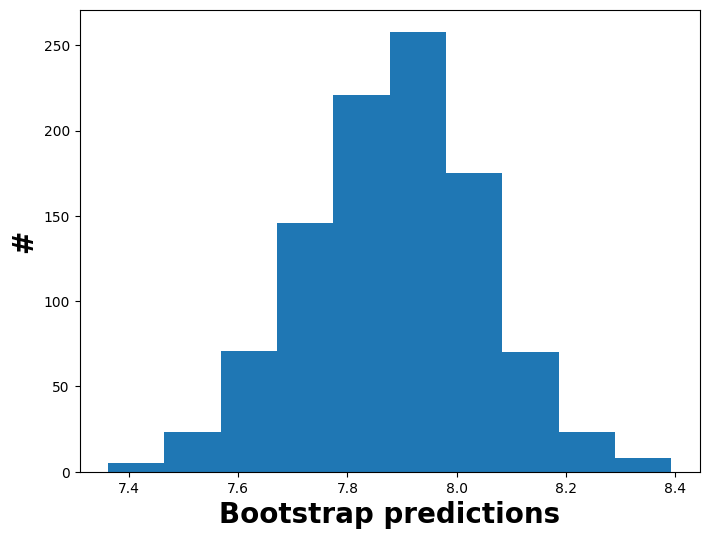

In [52]:
def table_bootstrape_slopes(df, x, y, given_x, repetition=1000):
    # Define DataFrame results to store each slope and intercept
    results = pd.DataFrame(columns=['slope', 'intercept', f'prediction at x={given_x}'])
    for i in np.arange(repetition):
        # Bootstrap sample_df from df
        sample_df = df.sample(n=len(df), replace=True).reset_index(drop=True)
        # Add intercept a and slope b to resutls
        x_data =sample_df[x].values.reshape(-1, 1)
        y_data = sample_df[y].values.reshape(-1, 1)
        regr = linear_model.LinearRegression()
        regr.fit (x_data, y_data)
        a,b=regr.coef_[0][0],regr.intercept_[0]
        fitted = a * given_x+b
        results.loc[len(results)] = [a, b, fitted]
    return results
resampled_predictions=table_bootstrape_slopes(nfl, 'Pick Number', 'Career Length', 169, repetition=1000)

fig, ax1 = plt.subplots(figsize=(8,6), facecolor='w', edgecolor='k')

# Horizontal Bar Plot
ax1.hist(resampled_predictions.iloc[:,2])
ax1.set_ylabel('#',fontsize=20,fontweight='bold')
ax1.set_xlabel('Career length',fontsize=20,fontweight='bold')
plt.show()

<!-- END QUESTION -->

#### Question 20

Using `resampled_predictions` from Question 19, generate a 99% confidence interval for Evan's predicted career lengths.


<!--
BEGIN QUESTION
name: q1_20
manual: false
-->

In [53]:
confidence_level = 99

# Calculate the lower and upper bounds of the confidence interval
lower_bound_evan = np.percentile(n, (100 - confidence_level) / 2)
upper_bound_evan = np.percentile(resampled_predictions.iloc[:,2], 100 - (100 - confidence_level) / 2)


# Don't delete/modify the code below in this cell
print(f"99% CI: [{lower_bound_evan}, {upper_bound_evan}]")

99% CI: [7.4666312704295, 8.302393105479556]


In [ ]:
grader.check("q1_20")

Run the following cell to see a few bootstrapped regression lines, and the predictions they make for a career length from a pick number of 169.

In [73]:
# Just run this cell! 
# You don't need to understand all of what it is doing but you should recognize a lot of the code!
lines = Table(['slope','intercept'])
x=169
for i in np.arange(20):
    resamp = nfl.sample(with_replacement=True)
    resample_pars = parameters(resamp, "Pick Number", "Career Length") 
    slope = resample_pars.item(0)
    intercept = resample_pars.item(1)
    lines.append([slope, intercept])
    
lines['prediction at x='+str(x)] = lines.column('slope')*x + lines.column('intercept')
xlims = [min(nfl.column("Pick Number")), max(nfl.column("Pick Number"))]
left = xlims[0]*lines[0] + lines[1]
right = xlims[1]*lines[0] + lines[1]
fit_x = x*lines['slope'] + lines['intercept']
for i in range(20):
    plt.plot(xlims, np.array([left[i], right[i]]), lw=1)
    plt.scatter(x, fit_x[i], s=30)
plt.ylabel("Career Length");
plt.xlabel("Pick Number");
plt.title("Resampled Regression Lines");

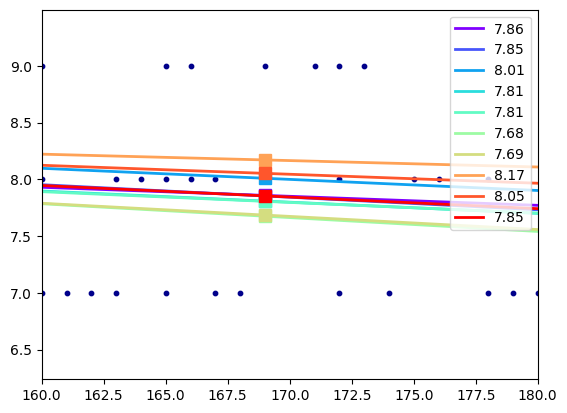

In [59]:
from matplotlib.pyplot import cm
def draw_bootstrape_slopes(df, x, y,given_x, repetition=10):
    table=table_bootstrape_slopes(df, x, y, given_x)
    
    plt.figure()
    plt.scatter(df[x], df[y], s=10, color='darkblue')

    plt.xlim([160, 180])
    plt.ylim([min(table.iloc[:, 2])-1,max(table.iloc[:, 2])+1])

    for i in range(repetition):
        a,b=table.slope[i],table.intercept[i]
        col=cm.rainbow(np.linspace(0, 1, repetition))
        plt.plot(np.array([160,180]), np.array([160, 180])*a+b, lw=2, color=col[i],label='%0.2f'%table.iloc[:, 2][i])
        plt.plot(given_x, table.iloc[:, 2][i],marker='s', ms=8, color=col[i])

        
        plt.legend()
    plt.show()
draw_bootstrape_slopes(nfl, 'Pick Number', 'Career Length', 169)    

#### Question 21

Does the Central Limit Theorem guarantee that the bootstrapped slopes or bootstrapped correlations will be normally distributed for any dataset that uses a large random sample? If you think yes, assign `True` to `clt_applies`, otherwise assign `False` to `clt_applies` if you think no. Are residuals normally distributed? If you think they are, assign `True` to `residuals_normal`, otherwise assign `False` to `residuals_normal`.


<!--
BEGIN QUESTION
name: q1_21
manual: false
-->

In [74]:
clt_applies = False
residuals_normal = False

In [ ]:
grader.check("q1_21")

<!-- BEGIN QUESTION -->

#### Question 22

What are some biases in this dataset that may have affected our analysis? Some questions you can ask yourself are: "is our sample a simple random sample?" or "what kind of data are we using/what variables are we dealing with: are they categorical, numerical, or both (both is something like ordinal data)?".

*Hint: you might want to revisit the beginning of this assignment to reread how this data/`nfl` table was generated.*


<!--
BEGIN QUESTION
name: q1_22
manual: true
-->

_Type your answer here, replacing this text._

<!-- END QUESTION -->



## (OPTIONAL, Out of Scope) Extending Linear Regression

This following section is completely **optional**, meaning there's no code to be graded/filled in. Just run the cells/explore if you're interested.

In the past few weeks you have learned one of the most powerful tools in a data scientist's arsenal: regression. At this point you may be wondering: what do we do when our data is not linear? You have learned that you shouldn't try and force models when they are bad fits: for example, if we detect heteroscedasticity in our residuals plot, we know that linear regression is a bad fit.

How can we fit data that is not linear then?

Let's increase our data's complexity a little: instead of linear data, let's look at data that you would naturally model with a parabola instead:

In [77]:
def parabola(x, a=1, b=0, c=0):
    random_noise = np.random.normal(size=len(x)) * 3
    return  a*(x**2) + b*(x) + c + random_noise

size = 500
x_values = np.random.uniform(-5, 10, size=size)
y_values = parabola(x_values, a=2, b=-3, c=5)

Table().with_columns("X", x_values, "Y", y_values).scatter("X","Y", fit_line=True)

You can see that our line of best fit is a poor match for this data. Let's look at the residual plot:

In [78]:
def mse(slope, intercept):
    predicted_y = slope * x_values + intercept
    errors = y_values - predicted_y
    return np.mean(errors**2)


slope_and_intercept = minimize(mse, smooth=True)
predicted_y = slope_and_intercept.item(0) * x_values + slope_and_intercept.item(1)
residuals = y_values - predicted_y

Table().with_columns("X", x_values, "Residuals",residuals).scatter("X", "Residuals")

Our residuals clearly have a pattern, confirming that linear regression is a bad fit for this data! In fact, our residuals actually look like our original data.

Linear regression generates a line that minimizes mean squared error. Using the `minimize` function on the `mse` function does all the work of finding values for us! Can we use `minimize` for more complicated models? Yes! In future data science classes, you will learn how to find these values yourself using the mathematical fields of Linear Algebra (note that it involves lines!) and calculus!

Let's take a look at the equation for a line:

$$y = ax +b$$

There are two parameters here that we can change: $a$, which is the slope, and $b$, which is the intercept.

How about the equation for a parabola?

$$y = ax^2 + bx + c$$

Now there are three parameters, $a,b,c$.

Let's change our mse function to incorporate these three parameters!

In [79]:
def mse_parabola(a, b, c):
    predicted_y = a * (x_values**2) + b * (x_values) + c
    errors = y_values - predicted_y
    return np.mean(errors**2)

The function still returns the mean squared error of our predicted curve, just our curve is now a parabola with the parameters `a`, `b`, and `c`. Let's try and minimize this function!

In [80]:
params = minimize(mse_parabola, smooth=True)
a = params.item(0)
b = params.item(1)
c = params.item(2)
a, b, c

Let's plot our new curve with these values!

In [81]:
x_values_range = np.linspace(-5, 10, 1000)
predicted_y = a * (x_values_range**2) + b * (x_values_range) + c

Table().with_columns("X", x_values, "Y", y_values).scatter("X", "Y")
plt.plot(x_values_range, predicted_y, color='gold', markersize=1);

Our curve looks like a much better fit now! Let's double check the residuals plot to be sure.

In [82]:
residuals = y_values - (a * (x_values**2) + b * (x_values) + c)
Table().with_columns("X", x_values, "Residuals", residuals).scatter("X", "Residuals")

A formless cloud, excellent!

What else can the method of least squares do?

Can we predict a single variable based on the values of two other variables? Right now, we don't have a way of doing that. 

If you look at the previous example, you could say that the $x^2$ term is actually a second variable.

Let's generate a dataset to work with. We are going to try and predict `z` based on `x` and `y`.

In [83]:
x_values_range = np.linspace(-5, 10, 1000)

x = 0.5 * np.random.uniform(-5, 10, size=size) + 3
y = np.random.uniform(-5, 10, size=size) - 1
z = 3*x  + (-2*y) -4 + np.random.normal(size=size)

data = Table().with_columns("x", x, "y", y, "z", z)
data.scatter("x", "y")
data.scatter("x", "z")
data.scatter("y", "z")

We can see that `x` and `y` would both be very helpful to predict `z` by themselves! However, if we combined them we could predict `z` even better. Since our goal is to minimize mean squared error, let's find the mean squared error of the models that only use `x` and `y` by themselves (using an intercept).

In [84]:
from scipy import stats
def su(x):
    return (x-np.mean(x)) / np.std(x)
def r(x, y):
    return np.mean(su(x) * su(y))

def mse_x(slope, intercept):
    predicted_z = slope * x + intercept
    errors = z - predicted_z
    return np.mean(errors**2)

def mse_y(slope, intercept):
    predicted_z = slope * y + intercept
    errors = z - predicted_z
    return np.mean(errors**2)


slope_and_intercept_x = minimize(mse_x, smooth=True)
predicted_z_x = slope_and_intercept_x.item(0) * x + slope_and_intercept_x.item(1)
residuals_x = z - predicted_z_x

Table().with_columns("X", x, "Residuals for X Model", residuals_x).scatter("X", "Residuals for X Model")

slope_and_intercept_y = minimize(mse_y, smooth=True)
predicted_z_y = slope_and_intercept_y.item(0) * y + slope_and_intercept_y.item(1)
residuals_y = z - predicted_z_y

Table().with_columns("Y", y, "Residuals for Y Model", residuals_y).scatter("Y", "Residuals for Y Model")

Both of the residual plots show no trend, so using these `x` or `y` by themselves would work, but how good are these models? Let's calculate their actual mse.

In [85]:
x_only_mse = mse_x(slope_and_intercept_x.item(0), slope_and_intercept_x.item(1))
y_only_mse = mse_y(slope_and_intercept_y.item(0), slope_and_intercept_y.item(1))

print(f"X only model MSE: {x_only_mse}, Y only model MSE: {y_only_mse}")

Looks like the y only model has lower MSE, so we should try and use that if we can only use `x` or `y`. 

Instead, let's try to build a model that is a combination of `x`, `y` and an intercept `c` to predict `z`!

$$z = ax + by +c$$

In [86]:
def mse_both(a, b, c):
    predicted_z = (a * x) + (b * y) + c
    errors = z - predicted_z
    return np.mean(errors**2)

slope_and_intercept_both = minimize(mse_both, smooth=True)
predicted_z = (slope_and_intercept_both.item(0) * x) + (slope_and_intercept_both.item(1) * y) + slope_and_intercept_both.item(2)
residuals = z - predicted_z

Table().with_columns("X", x, "Residuals for Full Model", residuals).scatter("X", "Residuals for Full Model")
Table().with_columns("Y", x, "Residuals for Full Model", residuals).scatter("Y", "Residuals for Full Model")

This model is also a good fit looking at the residuals with respect to both `x` and `y`! What is this model's mse?

In [87]:
full_model_mse = mse_both(slope_and_intercept_both.item(0), slope_and_intercept_both.item(1), slope_and_intercept_both.item(2))

print(f"X only model MSE: {x_only_mse}, Y only model MSE: {y_only_mse}, Both X and Y MSE: {full_model_mse}")

That MSE is much lower! We should definitely use this model instead of either the x only or y only model independently!
Let's try and visualize what this model looks like with a 3D graph!

In [88]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(10,7));
ax = fig.add_subplot(111, projection='3d');
ax.scatter(x, y, z);
ax.set_xlabel('X');
ax.set_ylabel('Y');
ax.set_zlabel('Z');

ax.scatter(x,y,predicted_z);

Once we start working in more dimensions, visualization becomes increasingly difficult and useless. Instead of predicting a line, our prediction is actually a plane of values (the red values)!

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

In [ ]:
grader.export(pdf=False)

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export()